# PCM Modeling

In this section of the tutorial, we will use the knowledge from all previous tutorials to construct a simple PCM classification model for four  adenosine receptors (A1, A2A, A2B, A3).

## Data Preparation

First, we need to load the data. For this tutorial we will load the dataset containing data for all four adenosine receptors.

In [1]:
from qsprpred.data import MoleculeTable
import os

os.makedirs('../../tutorial_output/data', exist_ok=True)

dataset = MoleculeTable.fromTableFile(
    name='PCMTutorialDataset', 
    filename='../../tutorial_data/AR_LIGANDS.tsv',
    store_dir='../../tutorial_output/data',
)

dataset.getDF()

,SMILES,pchembl_value_Mean,accession,QSPRID
QSPRID,,,,
PCMTutorialDataset_00000,Cc1nn(-c2cc(NC(=O)CCN(C)C)nc(-c3ccc(C)o3)n2)c(...,8.68,P29274,PCMTutorialDataset_00000
PCMTutorialDataset_00001,Cc1nn(-c2cc(NC(=O)CCN(C)C)nc(-c3ccc(C)o3)n2)c(...,6.68,P30542,PCMTutorialDataset_00001
PCMTutorialDataset_00002,Nc1c(C(=O)Nc2ccc([N+](=O)[O-])cc2)sc2c1cc1CCCC...,4.82,P29274,PCMTutorialDataset_00002
PCMTutorialDataset_00003,O=C(Nc1nc2ncccc2n2c(=O)n(-c3ccccc3)nc12)c1ccccc1,7.15,P0DMS8,PCMTutorialDataset_00003
PCMTutorialDataset_00004,O=C(Nc1nc2ncccc2n2c(=O)n(-c3ccccc3)nc12)c1ccccc1,5.65,P29274,PCMTutorialDataset_00004
...,...,...,...,...
PCMTutorialDataset_12452,CCCOc1ccc(C=Cc2cc3c(c(=O)n(C)c(=O)n3C)n2C)cc1,6.51,P29274,PCMTutorialDataset_12452
PCMTutorialDataset_12453,CCOC(=O)c1cnc(NCC(C)C)n2nc(-c3ccco3)nc12,7.61,P0DMS8,PCMTutorialDataset_12453
PCMTutorialDataset_12454,CCOC(=O)c1cnc(NCC(C)C)n2nc(-c3ccco3)nc12,7.35,P29274,PCMTutorialDataset_12454


### Fetching Protein Data

In addition, it is also possible to easily fetch the sequences for our proteins from [Papyrus](https://jcheminf.biomedcentral.com/articles/10.1186/s13321-022-00672-x) data set. You can find more information on how to fetch data from Papyrus within QSPRpred in the [data collection](../../basics/data/data_collection_with_papyrus.ipynb) tutorial. For now, we are using Papyrus ++ in version 05.6.

In [2]:
from qsprpred.data.sources.papyrus import Papyrus

# Papyrus database version 05.6
papyrus = Papyrus(
    data_dir="../../tutorial_data/papyrus",
    version='05.6',  # Papyrus database version
    stereo=False,
    plus_only=True,
)

# Get the protein sequences for the four adenosine receptors
acc_keys = ["P29274", "P29275", "P30542", "P0DMS8"] # A2AR, A2BR, A1R, A3R
dataset_seq = papyrus.getProteinData(acc_keys, name=f"{dataset.name}_seqs", use_existing=True, output_dir='../../tutorial_output/data')
dataset_seq

########## DISCLAIMER ##########
You are downloading the high-quality Papyrus++ dataset.
Should you want to access the entire, though of lower quality, Papyrus dataset,
look into additional switches of this command.
################################
Number of files to be downloaded: 3
Total size: 33.0MB


,target_id,HGNC_symbol,UniProtID,Status,Organism,Classification,Length,Sequence,TID,accession
48,P29275_WT,ADORA2B,AA2BR_HUMAN,reviewed,Homo sapiens (Human),Membrane receptor->Family A G protein-coupled ...,332,MLLETQDALYVALELVIAALSVAGNVLVCAAVGTANTLQTPTNYFL...,ChEMBL:CHEMBL255;ChEMBL:CHEMBL255;ChEMBL:CHEMB...,P29275
82,P30542_WT,ADORA1,AA1R_HUMAN,reviewed,Homo sapiens (Human),Membrane receptor->Family A G protein-coupled ...,326,MPPSISAFQAAYIGIEVLIALVSVPGNVLVIWAVKVNQALRDATFC...,ChEMBL:CHEMBL226;ChEMBL:CHEMBL226;ChEMBL:CHEMB...,P30542
83,P29274_WT,ADORA2A,AA2AR_HUMAN,reviewed,Homo sapiens (Human),Membrane receptor->Family A G protein-coupled ...,412,MPIMGSSVYITVELAIAVLAILGNVLVCWAVWLNSNLQNVTNYFVV...,ChEMBL:CHEMBL251;ChEMBL:CHEMBL251;ChEMBL:CHEMB...,P29274
84,P0DMS8_WT,ADORA3,AA3R_HUMAN,reviewed,Homo sapiens (Human),Membrane receptor->Family A G protein-coupled ...,318,MPNNSTALSLANVTYITMEIFIGLCAIVGNVLVICVVKLNPSLQTT...,ChEMBL:CHEMBL256;ChEMBL:CHEMBL256;ChEMBL:CHEMB...,P0DMS8


The  keys used to fetch the data are saved in the `accession` colum in the resulting data frame:

In [3]:
dataset.getSubset("accession")

,accession
QSPRID,
PCMTutorialDataset_00000,P29274
PCMTutorialDataset_00001,P30542
PCMTutorialDataset_00002,P29274
PCMTutorialDataset_00003,P0DMS8
PCMTutorialDataset_00004,P29274
...,...
PCMTutorialDataset_12452,P29274
PCMTutorialDataset_12453,P0DMS8
PCMTutorialDataset_12454,P29274


## Calculating Protein Descriptors

In this section, we will show how to connect the information about sequences with our data set and calculate protein descriptors using multiple sequence alignment and the `PCMDataSet` class from the `qsprpred.extra` package. First, let us convert the original data set saved in the `dataset` variable to a `PCMDataSet`:

In [4]:
from qsprpred.extra.data.data import PCMDataSet

def sequence_provider(acc_keys):
    """
    A function that provides a mapping from accession key to a protein sequence.

    Args:
        acc_keys (list): Accession keys of the protein to get a sequences for.

    Returns:
        (dict) : Mapping of accession keys to protein sequences.
        (dict) : Additional information to pass to the MSA provider (can be empty).
    """
    map = dict()
    info = dict()
    for i, row in dataset_seq.iterrows():
        map[row['accession']] = row['Sequence']

        # can be omitted
        info[row['accession']] = {
            'Organism': row['Organism'],
            'UniProtID': row['UniProtID'],
        }

    return map, info

dataset = PCMDataSet.fromMolTable(
    dataset,
    name=dataset.name,
    protein_col="accession",
    protein_seq_provider=sequence_provider,
    store_dir=dataset.storeDir,
    target_props=[{"name": "pchembl_value_Mean", "task": "REGRESSION"}]
)

dataset.save()

`PCMDataset` knows how to connect accession keys to sequences thanks to `proteinCol` and `proteinSeqProvider`. The `proteinSeqProvider` is a function that maps given accession keys to sequences, because this can be done in many different ways there is no default implementation. The `acc_keys` argument is there to make a more general implementation possible.

The `PCMDataset` will automatically create a multiple sequence alignment (MSA) for us when calculating protein descriptors,  which is facilitated through the `addProteinDescriptors` method and a `ProteinDescriptorCalculator`:

In [5]:
from qsprpred.extra.data.utils.msa_calculator import ClustalMSA
from qsprpred.extra.data.descriptors.sets import ProDec
from qsprpred.extra.data.descriptors.calculators import ProteinDescriptorCalculator

calc = ProteinDescriptorCalculator(
    desc_sets=[ProDec(sets=["Zscale Hellberg"])],
    msa_provider=ClustalMSA(out_dir=dataset.storeDir)
)
dataset.addProteinDescriptors(calc)

  0%|          | 0/4 [00:00<?, ?it/s]

We can check the descriptor matrix:

In [6]:
dataset.getDescriptors()

,Descriptor_PCM_ProDec_Zscale_1,Descriptor_PCM_ProDec_Zscale_2,Descriptor_PCM_ProDec_Zscale_3,Descriptor_PCM_ProDec_Zscale_4,Descriptor_PCM_ProDec_Zscale_5,Descriptor_PCM_ProDec_Zscale_6,Descriptor_PCM_ProDec_Zscale_7,Descriptor_PCM_ProDec_Zscale_8,Descriptor_PCM_ProDec_Zscale_9,Descriptor_PCM_ProDec_Zscale_10,...,Descriptor_PCM_ProDec_Zscale_1269,Descriptor_PCM_ProDec_Zscale_1270,Descriptor_PCM_ProDec_Zscale_1271,Descriptor_PCM_ProDec_Zscale_1272,Descriptor_PCM_ProDec_Zscale_1273,Descriptor_PCM_ProDec_Zscale_1274,Descriptor_PCM_ProDec_Zscale_1275,Descriptor_PCM_ProDec_Zscale_1276,Descriptor_PCM_ProDec_Zscale_1277,Descriptor_PCM_ProDec_Zscale_1278
QSPRID,,,,,,,,,,,,,,,,,,,,,
PCMTutorialDataset_00000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.09,2.23,-5.36,0.3,-2.69,-2.53,-1.29,1.96,-1.63,0.57
PCMTutorialDataset_00001,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-2.49,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
PCMTutorialDataset_00002,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.09,2.23,-5.36,0.3,-2.69,-2.53,-1.29,1.96,-1.63,0.57
PCMTutorialDataset_00003,-2.49,-0.27,-0.41,-1.22,0.88,2.23,3.22,1.45,0.84,3.22,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
PCMTutorialDataset_00004,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.09,2.23,-5.36,0.3,-2.69,-2.53,-1.29,1.96,-1.63,0.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PCMTutorialDataset_12452,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.09,2.23,-5.36,0.3,-2.69,-2.53,-1.29,1.96,-1.63,0.57
PCMTutorialDataset_12453,-2.49,-0.27,-0.41,-1.22,0.88,2.23,3.22,1.45,0.84,3.22,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
PCMTutorialDataset_12454,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.09,2.23,-5.36,0.3,-2.69,-2.53,-1.29,1.96,-1.63,0.57


We can of course combine this with molecular descriptors as well:

In [7]:
from qsprpred.data.descriptors.sets import FingerprintSet
from qsprpred.data.descriptors.calculators import MoleculeDescriptorsCalculator

dataset.nJobs = 12 # allowing parallelization to speed things up a little
calc = MoleculeDescriptorsCalculator(desc_sets=[FingerprintSet(fingerprint_type="MorganFP", radius=2, nBits=1024)])
dataset.addDescriptors(calc)
dataset.getDescriptors()

Parallel apply in progress for PCMTutorialDataset.:   0%|          | 0/21 [00:00<?, ?it/s]

,Descriptor_PCM_ProDec_Zscale_1,Descriptor_PCM_ProDec_Zscale_2,Descriptor_PCM_ProDec_Zscale_3,Descriptor_PCM_ProDec_Zscale_4,Descriptor_PCM_ProDec_Zscale_5,Descriptor_PCM_ProDec_Zscale_6,Descriptor_PCM_ProDec_Zscale_7,Descriptor_PCM_ProDec_Zscale_8,Descriptor_PCM_ProDec_Zscale_9,Descriptor_PCM_ProDec_Zscale_10,...,Descriptor_FingerprintSet_MorganFP_1014,Descriptor_FingerprintSet_MorganFP_1015,Descriptor_FingerprintSet_MorganFP_1016,Descriptor_FingerprintSet_MorganFP_1017,Descriptor_FingerprintSet_MorganFP_1018,Descriptor_FingerprintSet_MorganFP_1019,Descriptor_FingerprintSet_MorganFP_1020,Descriptor_FingerprintSet_MorganFP_1021,Descriptor_FingerprintSet_MorganFP_1022,Descriptor_FingerprintSet_MorganFP_1023
QSPRID,,,,,,,,,,,,,,,,,,,,,
PCMTutorialDataset_00000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PCMTutorialDataset_00001,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-2.49,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PCMTutorialDataset_00002,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
PCMTutorialDataset_00003,-2.49,-0.27,-0.41,-1.22,0.88,2.23,3.22,1.45,0.84,3.22,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PCMTutorialDataset_00004,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PCMTutorialDataset_12452,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PCMTutorialDataset_12453,-2.49,-0.27,-0.41,-1.22,0.88,2.23,3.22,1.45,0.84,3.22,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PCMTutorialDataset_12454,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


To split the dataset we use the `PCMsplit`, which is a wrapper around the `DataSplit` class. It splits a dataset into train and test set such that the subsets are balanced with respect to each of the protein targets. This is done with https://github.com/sohviluukkonen/gbmt-splits, linear programming of initial clusters (random-, scaffold- or cluster-based) to get a balanced split.
It therefore expects either a `RandomSplit`, `ScaffoldSplit` or `ClusterSplit` object as input.

In [8]:
from qsprpred.extra.data.sampling.splits import PCMSplit
from qsprpred.data import RandomSplit

dataset.split(PCMSplit(splitter=RandomSplit(test_fraction=0.2), dataset=dataset)) # 20% test set per target

## Model Construction

Now that we have defined our preprocessing steps, we can construct our model. We will use a simple K-nearest neighbors model in this case, but notice that the training code is almost the same as in the simple [quick start](../../quick_start.ipynb). The only difference is that we are using the `SklearnPCMModel` class instead of `SklearnModel`:

In [9]:
from sklearn.neighbors import KNeighborsRegressor
from qsprpred.extra.models.pcm import SklearnPCMModel
from qsprpred.models import CrossValAssessor, TestSetAssessor

os.makedirs('../../tutorial_output/data', exist_ok=True)

model = SklearnPCMModel(
    base_dir='../../tutorial_output/models',
    data=dataset,
    alg=KNeighborsRegressor,
    name='PCMTutorialModel',
)

CrossValAssessor(scoring = 'r2')(model)
TestSetAssessor(scoring = 'r2')(model)
model.fitAttached()

'/zfsdata/data/helle/01_MainProjects/03_QSPRPred/Scripts/QSPRpred/tutorials/tutorial_output/models/PCMTutorialModel/PCMTutorialModel_meta.json'

In [10]:
from qsprpred.extra.models.pcm import SklearnPCMModel
model = SklearnPCMModel.fromFile("../../tutorial_output/models/PCMTutorialModel/PCMTutorialModel_meta.json")

The `SklearnPCMModel` class is a subclass of `SklearnModel` and thus inherits all of its functionality. The only difference is in how it handles predictions, which we will [show later](#model-prediction). Model evaluation and plotting is also the same as in the [quick start](../../quick_start.ipynb) tutorial:

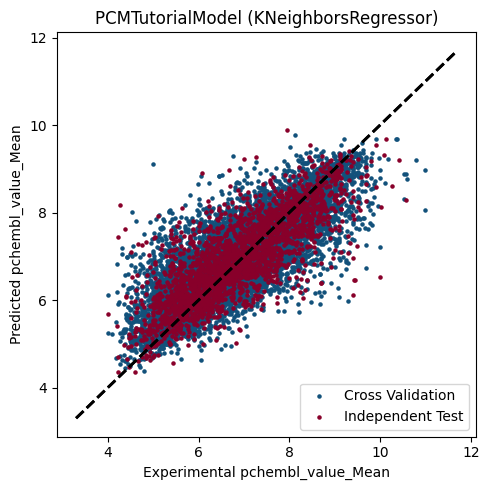

([<Axes: title={'center': 'PCMTutorialModel (KNeighborsRegressor)'}, xlabel='Experimental pchembl_value_Mean', ylabel='Predicted pchembl_value_Mean'>],
           ModelName        R2      RMSE  Set
 0  PCMTutorialModel  0.622201  0.690416   cv
 1  PCMTutorialModel  0.618356  0.699567  ind)

<Figure size 640x480 with 0 Axes>

In [11]:
from qsprpred.plotting.regression import CorrelationPlot

plot = CorrelationPlot([model])
plot.make(save=False, show=True, property_name="pchembl_value_Mean")

## Model Prediction

Prediction with the PCM model works similarly to regular models. We can load the saved model using its name (`PCMTutorialModel`) as usual:

In [12]:
model_from_files = SklearnPCMModel(name='PCMTutorialModel', base_dir = '../../tutorial_output/models')
model_from_files

But naturally when doing the prediction, we need to provide the protein ID to fetch protein descriptors for as well. When we created the model all necessary information to use the generated MSA and calculate protein descriptors was saved:

In [13]:
sample_mols = [
    'CN1C=NC2=C1C(=O)N(C(=O)N2C)C', # caffeine
    'c1ccccc1CCN1N=CC2=C1N=C(N)N3C2=NC(C4=CC=CO4)=N3' # SCH-58261 (50x more selective to A2A than caffeine -> more potent)
]

In [14]:
dataset.getSubset(dataset.proteinCol)[dataset.proteinCol].unique()

array(['P29274', 'P30542', 'P0DMS8', 'P29275'], dtype=object)

In [15]:
model_from_files.predictMols(
    sample_mols,
    protein_id = 'P29274', # human adenosine A2A receptor
)

  0%|          | 0/4 [00:00<?, ?it/s]

array([[6.35933333],
       [8.49261538]])

Now that makes sense. We can see that for the selective compound (`SCH-58261`), the model predicts it as very active. If we use the same compounds with the other isoforms, we can see that although the model predicts it as active for all isoforms, it is not as active for the A2A isoform:

In [16]:
model_from_files.predictMols(
    sample_mols,
    protein_id = 'P30542', # human adenosine A1 receptor
)

  0%|          | 0/4 [00:00<?, ?it/s]

array([[5.286],
       [6.969]])

In [17]:
model_from_files.predictMols(
    sample_mols,
    protein_id = 'P0DMS8', # human adenosine A3 receptor
)

  0%|          | 0/4 [00:00<?, ?it/s]

array([[6.03  ],
       [6.1895]])

In [18]:
model_from_files.predictMols(
    sample_mols,
    protein_id = 'P29275', # human adenosine A2B receptor
)

  0%|          | 0/4 [00:00<?, ?it/s]

array([[5.386],
       [6.845]])